In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *
sns.set()

### Bandit settings

In [84]:
T = int(1e3)

n_arms = 4
n_features = 20
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 3

SEED = 42
np.random.seed(SEED)

### LinUCB on linear rewards

In [4]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)

In [5]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 1000/1000 [00:00<00:00, 6515.67it/s, total regret=106, % optimal arm=90.01%]


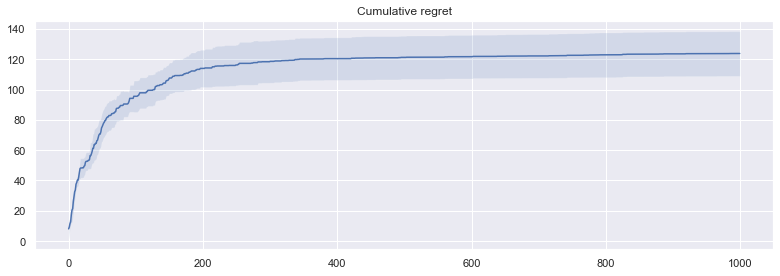

In [6]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

### NeuralUCB on linear rewards

In [7]:
p = 0.2
hidden_size = 64
epochs = 100
train_every = 10
confidence_scaling_factor = 1.0
use_cuda = False

In [8]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets_neural = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets_neural[i] = np.cumsum(model.regrets)

100%|██████████| 1000/1000 [00:22<00:00, 44.16it/s, total regret=313, % optimal arm=83.80%]


### Sublinear regret growth : the bandit problem is solved efficiently

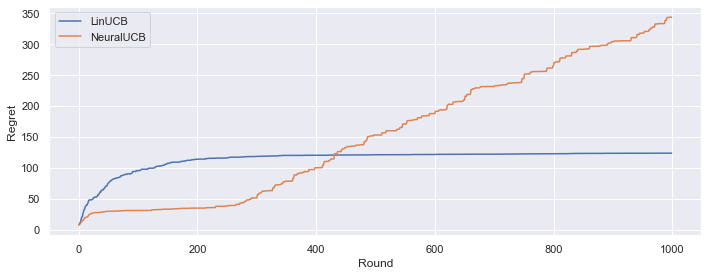

In [10]:
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
mean_regrets_neural = np.mean(regrets_neural, axis=0)

std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
std_regrets_neural = np.std(regrets_neural, axis=0) / np.sqrt(regrets_neural.shape[0])

ax.plot(mean_regrets, label="LinUCB")
ax.plot(mean_regrets_neural, label="NeuralUCB")

# ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
# ax.fill_between(t, mean_regrets_neural - 2*std_regrets_neural, mean_regrets_neural + 2*std_regrets_neural, alpha=0.15)

# ax.set_title('Linear Cumulative regret')
ax.set_ylabel('Regret')
ax.set_xlabel('Round')
ax.legend()

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_neuralucb_linear.png')

### LinUCB on quadratic rewards

In [85]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [86]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 1000/1000 [00:00<00:00, 5562.07it/s, total regret=4.82e+3, % optimal arm=38.29%]


### NeuralUCB on quadratic rewards

In [13]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets_neural = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets_neural[i] = np.cumsum(model.regrets)

100%|██████████| 1000/1000 [00:22<00:00, 44.14it/s, total regret=595, % optimal arm=78.10%]


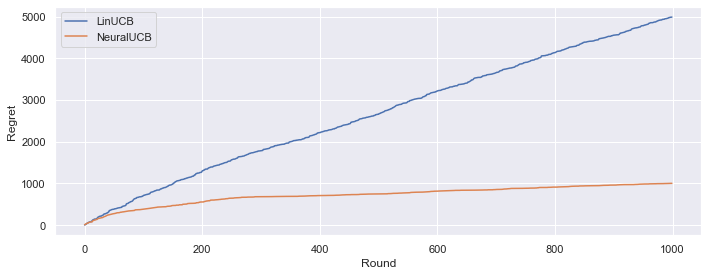

In [14]:
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
mean_regrets_neural = np.mean(regrets_neural, axis=0)

std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
std_regrets_neural = np.std(regrets_neural, axis=0) / np.sqrt(regrets_neural.shape[0])

ax.plot(mean_regrets, label="LinUCB")
ax.plot(mean_regrets_neural, label="NeuralUCB")

# ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
# ax.fill_between(t, mean_regrets_neural - 2*std_regrets_neural, mean_regrets_neural + 2*std_regrets_neural, alpha=0.15)

# ax.set_title('Linear Cumulative regret')
ax.set_ylabel('Regret')
ax.set_xlabel('Round')
ax.legend()

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_neuralucb_quadratic.png')

### LinUCB on highly nonlinear rewards (cosine)

In [87]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: np.cos(10*np.dot(x, a))

In [88]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 1000/1000 [00:00<00:00, 6125.58it/s, total regret=645, % optimal arm=25.75%]


### Linear regret growth: the bandit problem fails

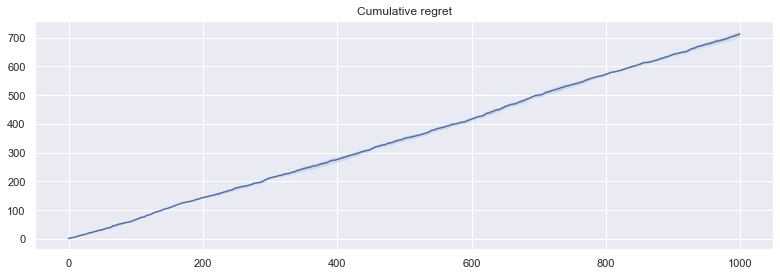

In [89]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

# fig.savefig('figures/linucb_cosine.pdf')

### NeuralUCB on highly nonlinear rewards (cosine)

In [90]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets_neural = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets_neural[i] = np.cumsum(model.regrets)

100%|██████████| 1000/1000 [00:22<00:00, 44.08it/s, total regret=190, % optimal arm=64.80%]


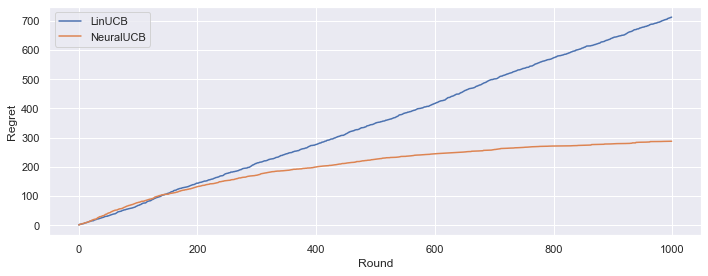

In [92]:
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
mean_regrets_neural = np.mean(regrets_neural, axis=0)

std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
std_regrets_neural = np.std(regrets_neural, axis=0) / np.sqrt(regrets_neural.shape[0])

ax.plot(mean_regrets, label="LinUCB")
ax.plot(mean_regrets_neural, label="NeuralUCB")

# ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
# ax.fill_between(t, mean_regrets_neural - 2*std_regrets_neural, mean_regrets_neural + 2*std_regrets_neural, alpha=0.15)

# ax.set_title('Linear Cumulative regret')
ax.set_ylabel('Regret')
ax.set_xlabel('Round')
ax.legend()

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_neuralucb_cosine.png')